In [18]:
# 키프레임 추출한 csv 파일 추출(fall)

import pandas as pd
url = "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/keypoint_con/keypoints_fall_con.csv"
df1 = pd.read_csv(url)

print(df1.head())

  class video_folder           frame  keypoint_index         x         y  \
0  Fall      fall_01  frame_0000.jpg               0  0.446386  0.357385   
1  Fall      fall_01  frame_0000.jpg               1  0.454791  0.350321   
2  Fall      fall_01  frame_0000.jpg               2  0.437988  0.350087   
3  Fall      fall_01  frame_0000.jpg               3  0.461094  0.347411   
4  Fall      fall_01  frame_0000.jpg               4  0.424107  0.350340   

   confidence  
0    0.596156  
1    0.595182  
2    0.523923  
3    0.637590  
4    0.589970  


In [19]:
# long format -> 모델에 입력받을 시퀀스 형태로 저장(fall)
import numpy as np

all_sequences = []
all_labels = []

for i in range(1, 31):
    video_id = f"fall_{i:02d}"  # fall_01, fall_02, ..., fall_30
    df_video = df1[(df1["video_folder"] == video_id) & (df1["class"] == "Fall")]
    if df_video.empty:
        print(f"{video_id} 데이터가 없습니다.")
        continue

    df_video = df_video.sort_values(by=["frame", "keypoint_index"])
    frames = df_video["frame"].unique()

    sequence = []
    for f in frames:
        df_frame = df_video[df_video["frame"] == f]
        coords = df_frame[["x", "y"]].values.flatten()
        sequence.append(coords)

    sequence = np.stack(sequence)  # (프레임 수, 34)
    all_sequences.append(sequence)
    all_labels.append(2) # 낙상 클래스2

print(f"총 시퀀스 개수: {len(all_sequences)}")
print(f"첫 시퀀스 shape: {all_sequences[0].shape}")



총 시퀀스 개수: 30
첫 시퀀스 shape: (259, 34)


In [20]:
# 키프레임 추출한 csv 파일 추출(suspicious)

url = "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/keypoint_con/keypoints_suspicious_con.csv"
df2 = pd.read_csv(url)

print(df2.head())

        class video_folder           frame  keypoint_index         x  \
0  Suspicious       sus_01  frame_0000.jpg               0  0.409221   
1  Suspicious       sus_01  frame_0000.jpg               1  0.406523   
2  Suspicious       sus_01  frame_0000.jpg               2  0.415394   
3  Suspicious       sus_01  frame_0000.jpg               3  0.393519   
4  Suspicious       sus_01  frame_0000.jpg               4  0.415428   

          y  confidence  
0  0.345961    0.159283  
1  0.336220    0.075232  
2  0.335941    0.130593  
3  0.328424    0.122683  
4  0.330966    0.161106  


In [21]:
# long format -> 모델에 입력받을 시퀀스 형태로 저장(suspicious)

all_sequences1 = []
all_labels1 = []

for i in range(1, 22):
    video_id = f"sus_{i:02d}"
    df_video = df2[(df2["video_folder"] == video_id) & (df2["class"] == "Suspicious")]
    if df_video.empty:
        print(f"{video_id} 데이터가 없습니다.")
        continue

    df_video = df_video.sort_values(by=["frame", "keypoint_index"])
    frames = df_video["frame"].unique()

    sequence = []
    for f in frames:
        df_frame = df_video[df_video["frame"] == f]
        coords = df_frame[["x", "y"]].values.flatten()
        sequence.append(coords)

    sequence = np.stack(sequence)  # (프레임 수, 34)
    all_sequences1.append(sequence)
    all_labels1.append(1) # 위험 클래스 1

print(f"총 시퀀스 개수: {len(all_sequences1)}")
print(f"첫 시퀀스 shape: {all_sequences1[0].shape}")

sus_04 데이터가 없습니다.
총 시퀀스 개수: 20
첫 시퀀스 shape: (252, 34)


In [22]:
url = "https://raw.githubusercontent.com/OpenSourceProgramming-S-H-E/SafePose/refs/heads/develop/keypoint_con/keypoints_normal_con.csv"
df3 = pd.read_csv(url)

print(df3.head())

    class video_folder           frame  keypoint_index         x         y  \
0  Normal    normal_01  frame_0000.jpg               0  0.491582  0.362946   
1  Normal    normal_01  frame_0000.jpg               1  0.499338  0.356676   
2  Normal    normal_01  frame_0000.jpg               2  0.483186  0.354573   
3  Normal    normal_01  frame_0000.jpg               3  0.507564  0.360179   
4  Normal    normal_01  frame_0000.jpg               4  0.473766  0.356689   

   confidence  
0    0.491786  
1    0.523412  
2    0.572754  
3    0.681367  
4    0.676613  


In [23]:
# long format -> 모델에 입력받을 시퀀스 형태로 저장(normal)

all_sequences2 = []
all_labels2 = []

for i in range(1, 35):
    video_id = f"normal_{i:02d}"
    df_video = df3[(df3["video_folder"] == video_id) & (df3["class"] == "Normal")]
    if df_video.empty:
        print(f"{video_id} 데이터가 없습니다.")
        continue

    df_video = df_video.sort_values(by=["frame", "keypoint_index"])
    frames = df_video["frame"].unique()

    sequence = []
    for f in frames:
        df_frame = df_video[df_video["frame"] == f]
        coords = df_frame[["x", "y"]].values.flatten()
        sequence.append(coords)

    sequence = np.stack(sequence)  # (프레임 수, 34)
    all_sequences2.append(sequence)
    all_labels2.append(0) # 정상 클래스 0

print(f"총 시퀀스 개수: {len(all_sequences2)}")
print(f"첫 시퀀스 shape: {all_sequences2[0].shape}")

normal_28 데이터가 없습니다.
총 시퀀스 개수: 33
첫 시퀀스 shape: (271, 34)


In [24]:
print(f"fall 라벨 개수: {len(all_labels)}")
print(f"sus 라벨 개수: {len(all_labels1)}")
print(f"Normal 라벨 개수: {len(all_labels2)}")

fall 라벨 개수: 30
sus 라벨 개수: 20
Normal 라벨 개수: 33


In [25]:
# 입력 시퀀스 길이 패딩

X_all = all_sequences + all_sequences1 + all_sequences2
y_all = all_labels + all_labels1 + all_labels2

print(set(y_all))

{0, 1, 2}


In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

MAX_LEN = 271

X_all_padded = pad_sequences(X_all, maxlen=MAX_LEN, dtype='float32', padding='post', truncating='post')
X_all_padded = np.array(X_all_padded)
y_all = np.array(y_all)

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = np.array([
    MinMaxScaler().fit_transform(seq) for seq in X_all_padded
])

In [28]:
# 학습/ 검증용 데이터 분할

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_all, test_size=0.2, random_state=42, stratify=y_all)

In [29]:
# LSTM 기반 모델 구성 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking

model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=(MAX_LEN, 34)))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))


c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
# 모델 컴파일

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_1 (Masking)             │ (None, 271, 34)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 271, 128)       │        83,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 271, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,219 (536.01 KB)

 Trainable params: 137,219 (536.01 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val))

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 396ms/step - accuracy: 0.2664 - loss: 1.1160 - val_accuracy: 0.4118 - val_loss: 1.0774
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step - accuracy: 0.3673 - loss: 1.1075 - val_accuracy: 0.4118 - val_loss: 1.0826
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 323ms/step - accuracy: 0.3447 - loss: 1.1280 - val_accuracy: 0.4118 - val_loss: 1.0576
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step - accuracy: 0.4463 - loss: 1.0594 - val_accuracy: 0.5882 - val_loss: 1.0531
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step - accuracy: 0.3419 - loss: 1.1067 - val_accuracy: 0.3529 - val_loss: 1.0737
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step - accuracy: 0.3842 - loss: 1.0733 - val_accuracy: 0.5882 - val_loss: 1.0535
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 331ms/step - accuracy: 0.4550 - loss: 1.0724 - val_accuracy: 0.4706 - val_loss: 1.0535
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 330ms/step - accuracy: 0.4044 - loss: 1.0861 - val_accuracy: 0.4706 - val_loss:

In [32]:
model.save("fall_detection_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
📊 Classification Report
              precision    recall  f1-score   support

      Normal       0.64      1.00      0.78         7
  Suspicious       0.00      0.00      0.00         4
        Fall       0.67      0.67      0.67         6

    accuracy                           0.65        17
   macro avg       0.43      0.56      0.48        17
weighted avg       0.50      0.65      0.56        17



c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


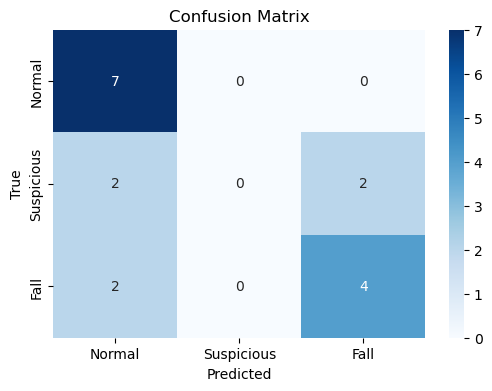

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 예측
y_pred = model.predict(X_val)
y_pred_label = np.argmax(y_pred, axis=1)
y_true_label = y_val  

# 평가 결과 출력
print("📊 Classification Report")
print(classification_report(y_true_label, y_pred_label, target_names=['Normal', 'Suspicious', 'Fall']))

# confusion matrix 시각화
cm = confusion_matrix(y_true_label, y_pred_label)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Suspicious', 'Fall'],
            yticklabels=['Normal', 'Suspicious', 'Fall'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
